In [1]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from ultralytics import YOLO
import torch
from IPython.display import clear_output, Image, display
import time

# Check GPU
device = 0 if torch.cuda.is_available() else 'cpu'
print(f"🔍 Device: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
🔍 Device: Tesla T4


In [4]:
# Load model
print("\n📦 Loading YOLOv11m...")
model = YOLO('yolo11m.pt')


📦 Loading YOLOv11m...


In [5]:
# Training
print("\n🚀 Starting training...")
print("="*60)

results = model.train(
    data='construction-ppe.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    device=device,
    project='ppe_training',
    name='yolo11m_ppe',
    patience=50,
    save=True,
    save_period=10,
    cache=True,

    # Hyperparameters
    lr0=0.01,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3.0,
    warmup_momentum=0.8,

    # Augmentation
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.5,
    shear=0.0,
    perspective=0.0,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.0,

    # Validation
    val=True,
    plots=True,
    verbose=True,
)

print("\n" + "="*60)
print("✅ TRAINING COMPLETED!")
print("="*60)



🚀 Starting training...
Ultralytics 8.3.224 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=construction-ppe.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11m_ppe, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=50, perspective=0.0,


📊 TRAINING RESULTS:



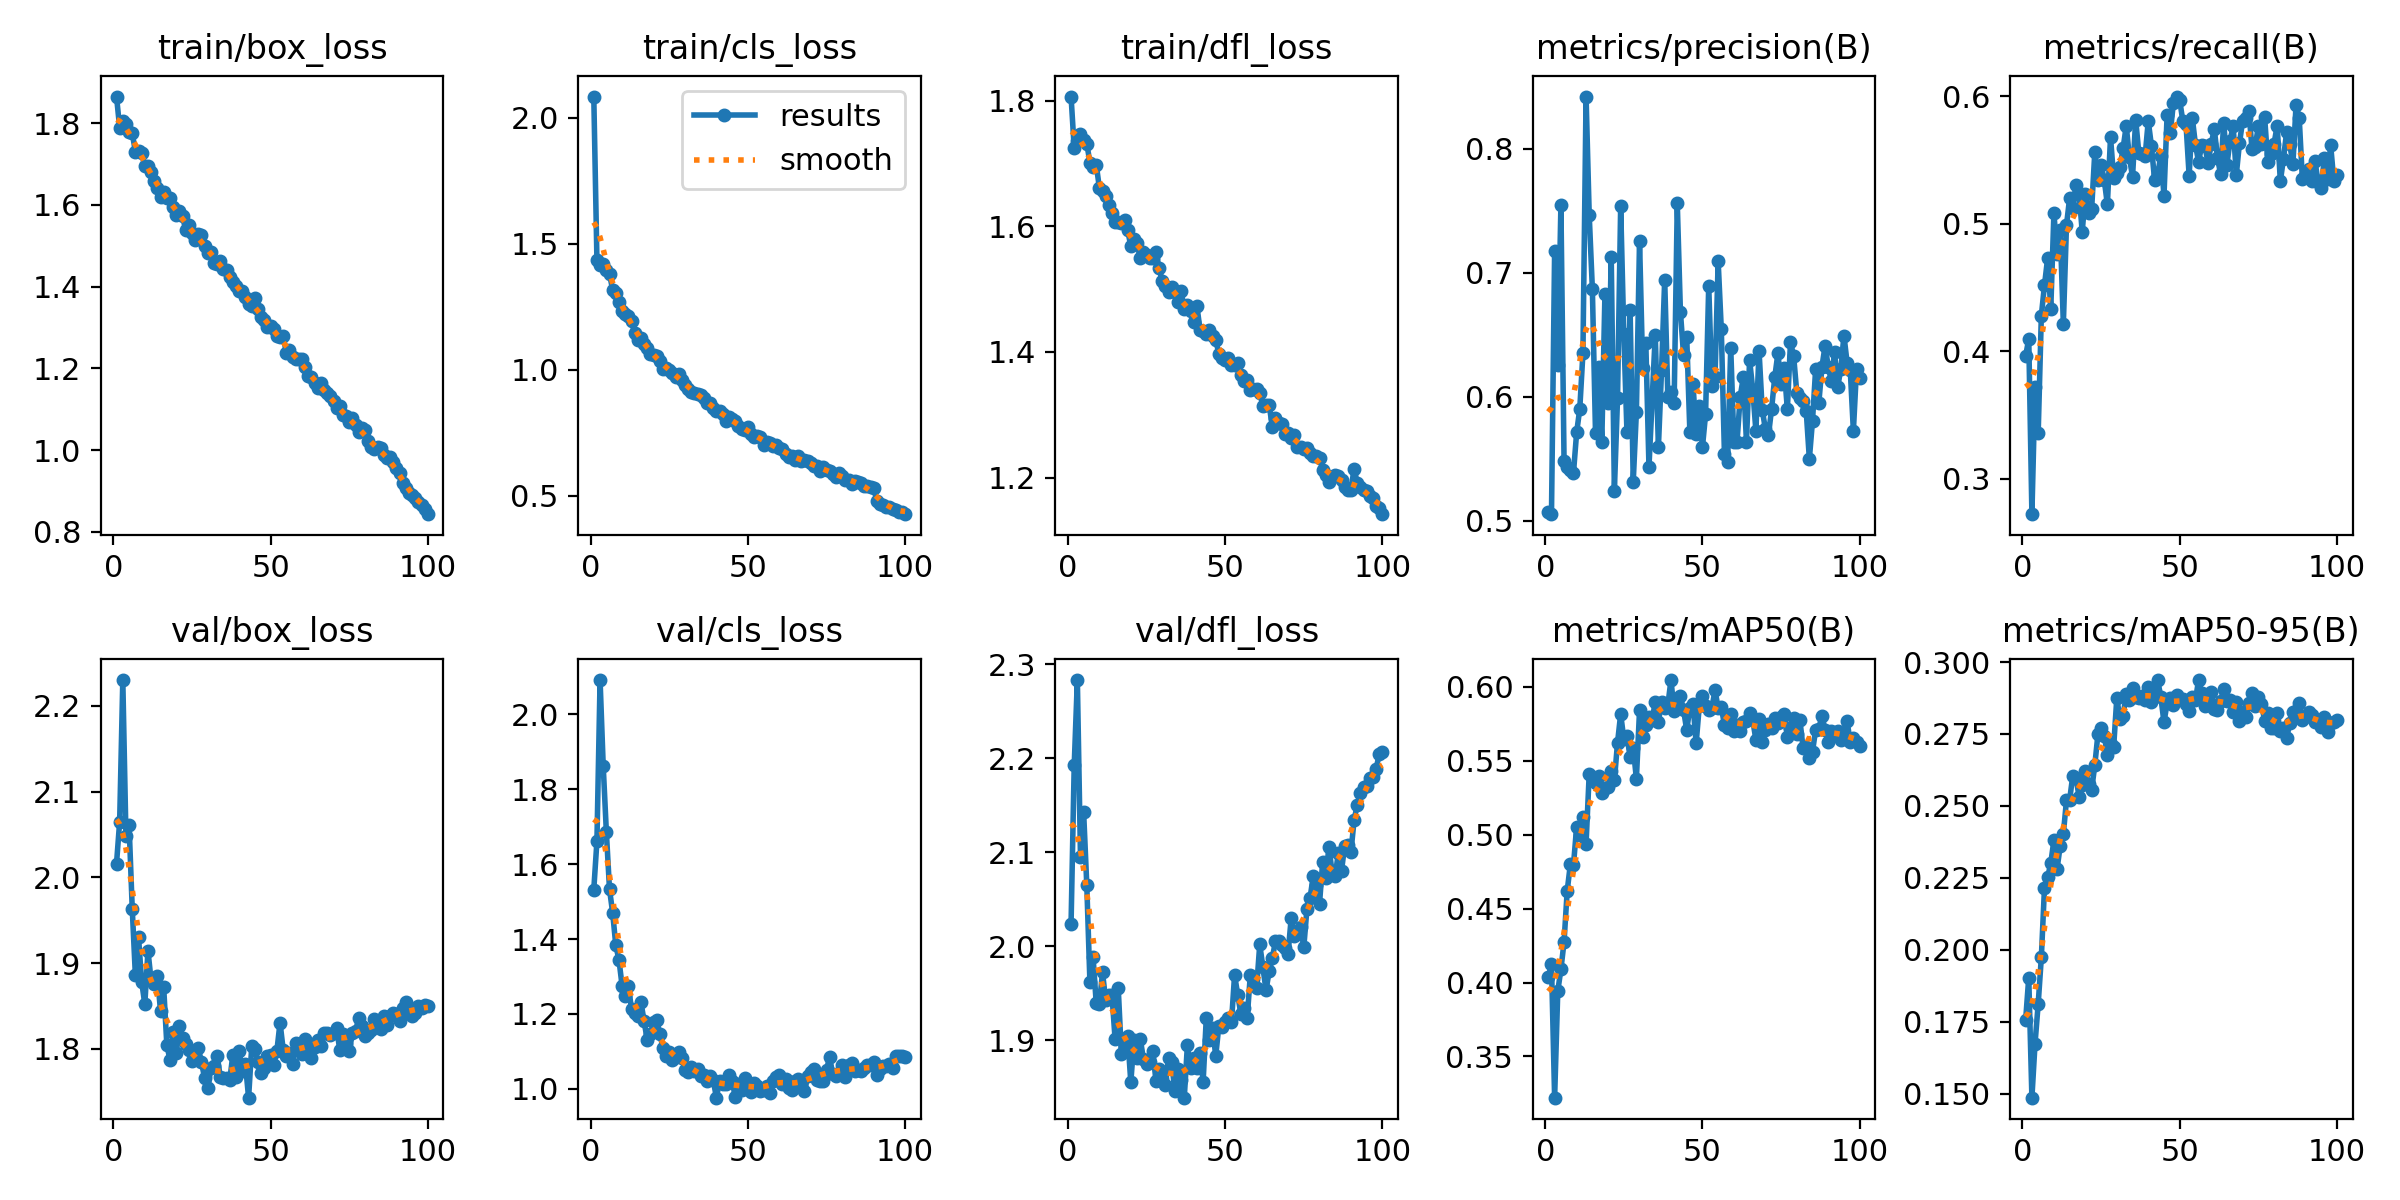


📊 CONFUSION MATRIX:



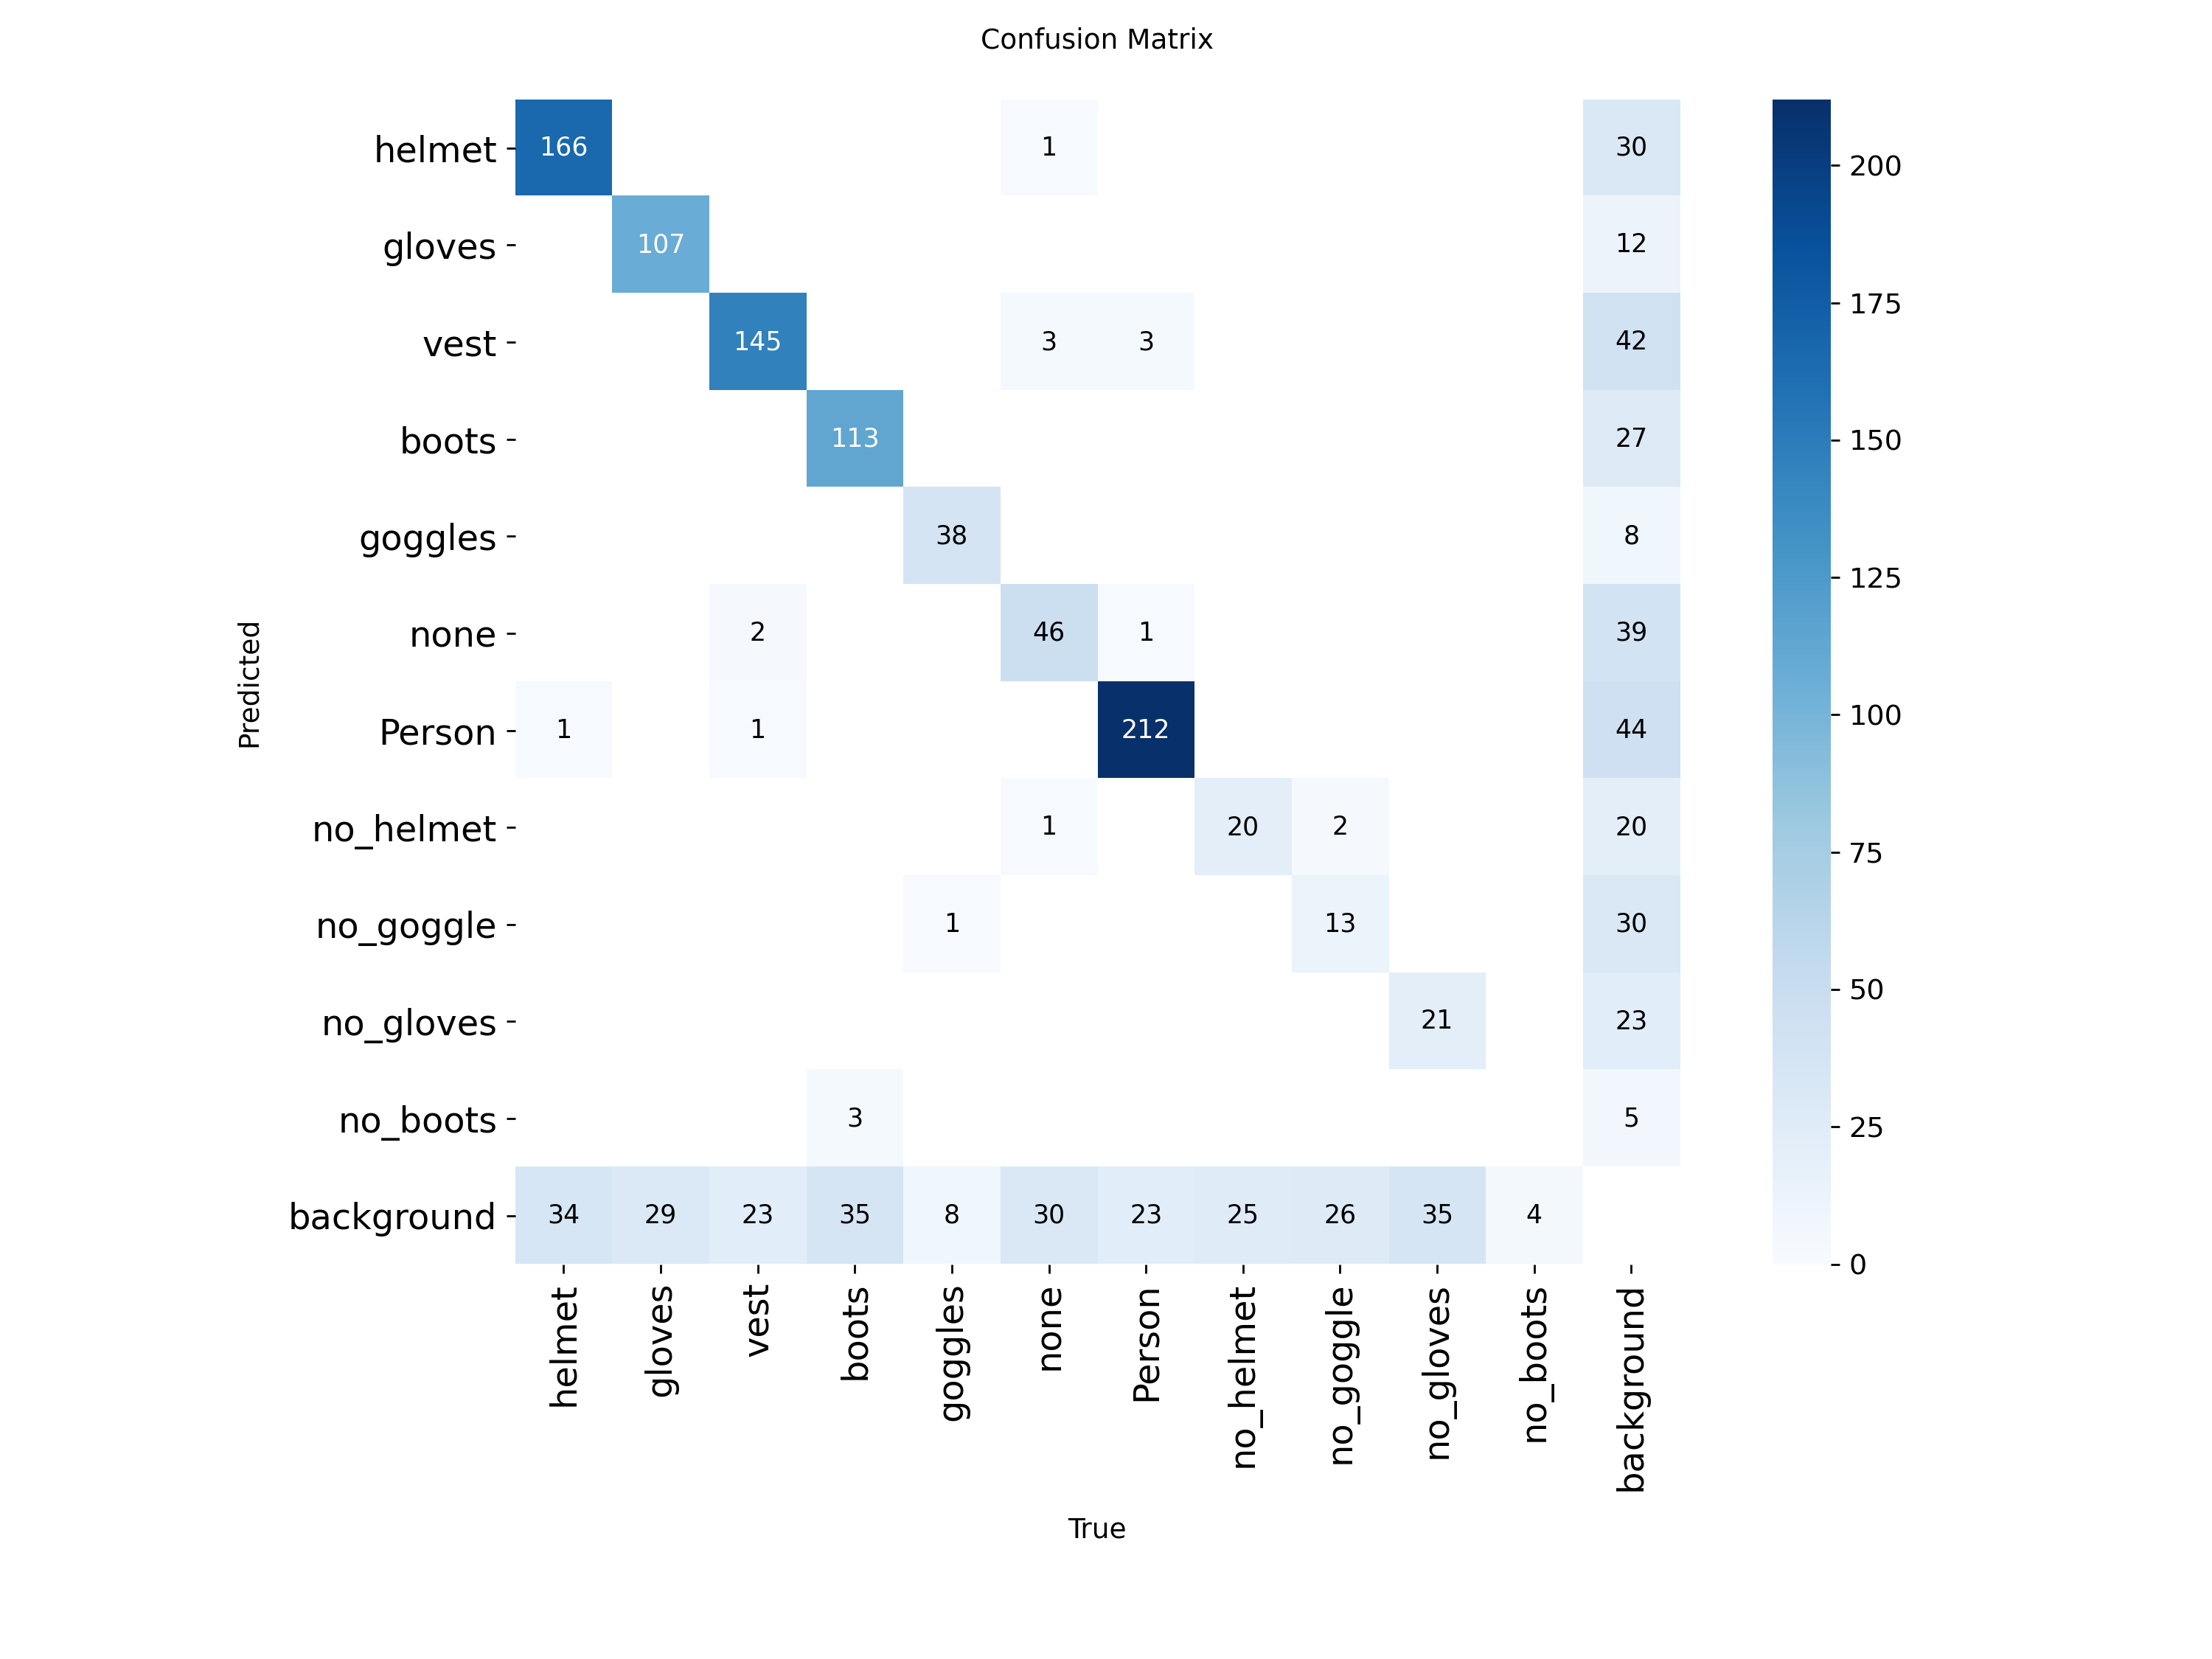


📊 VALIDATION PREDICTIONS:



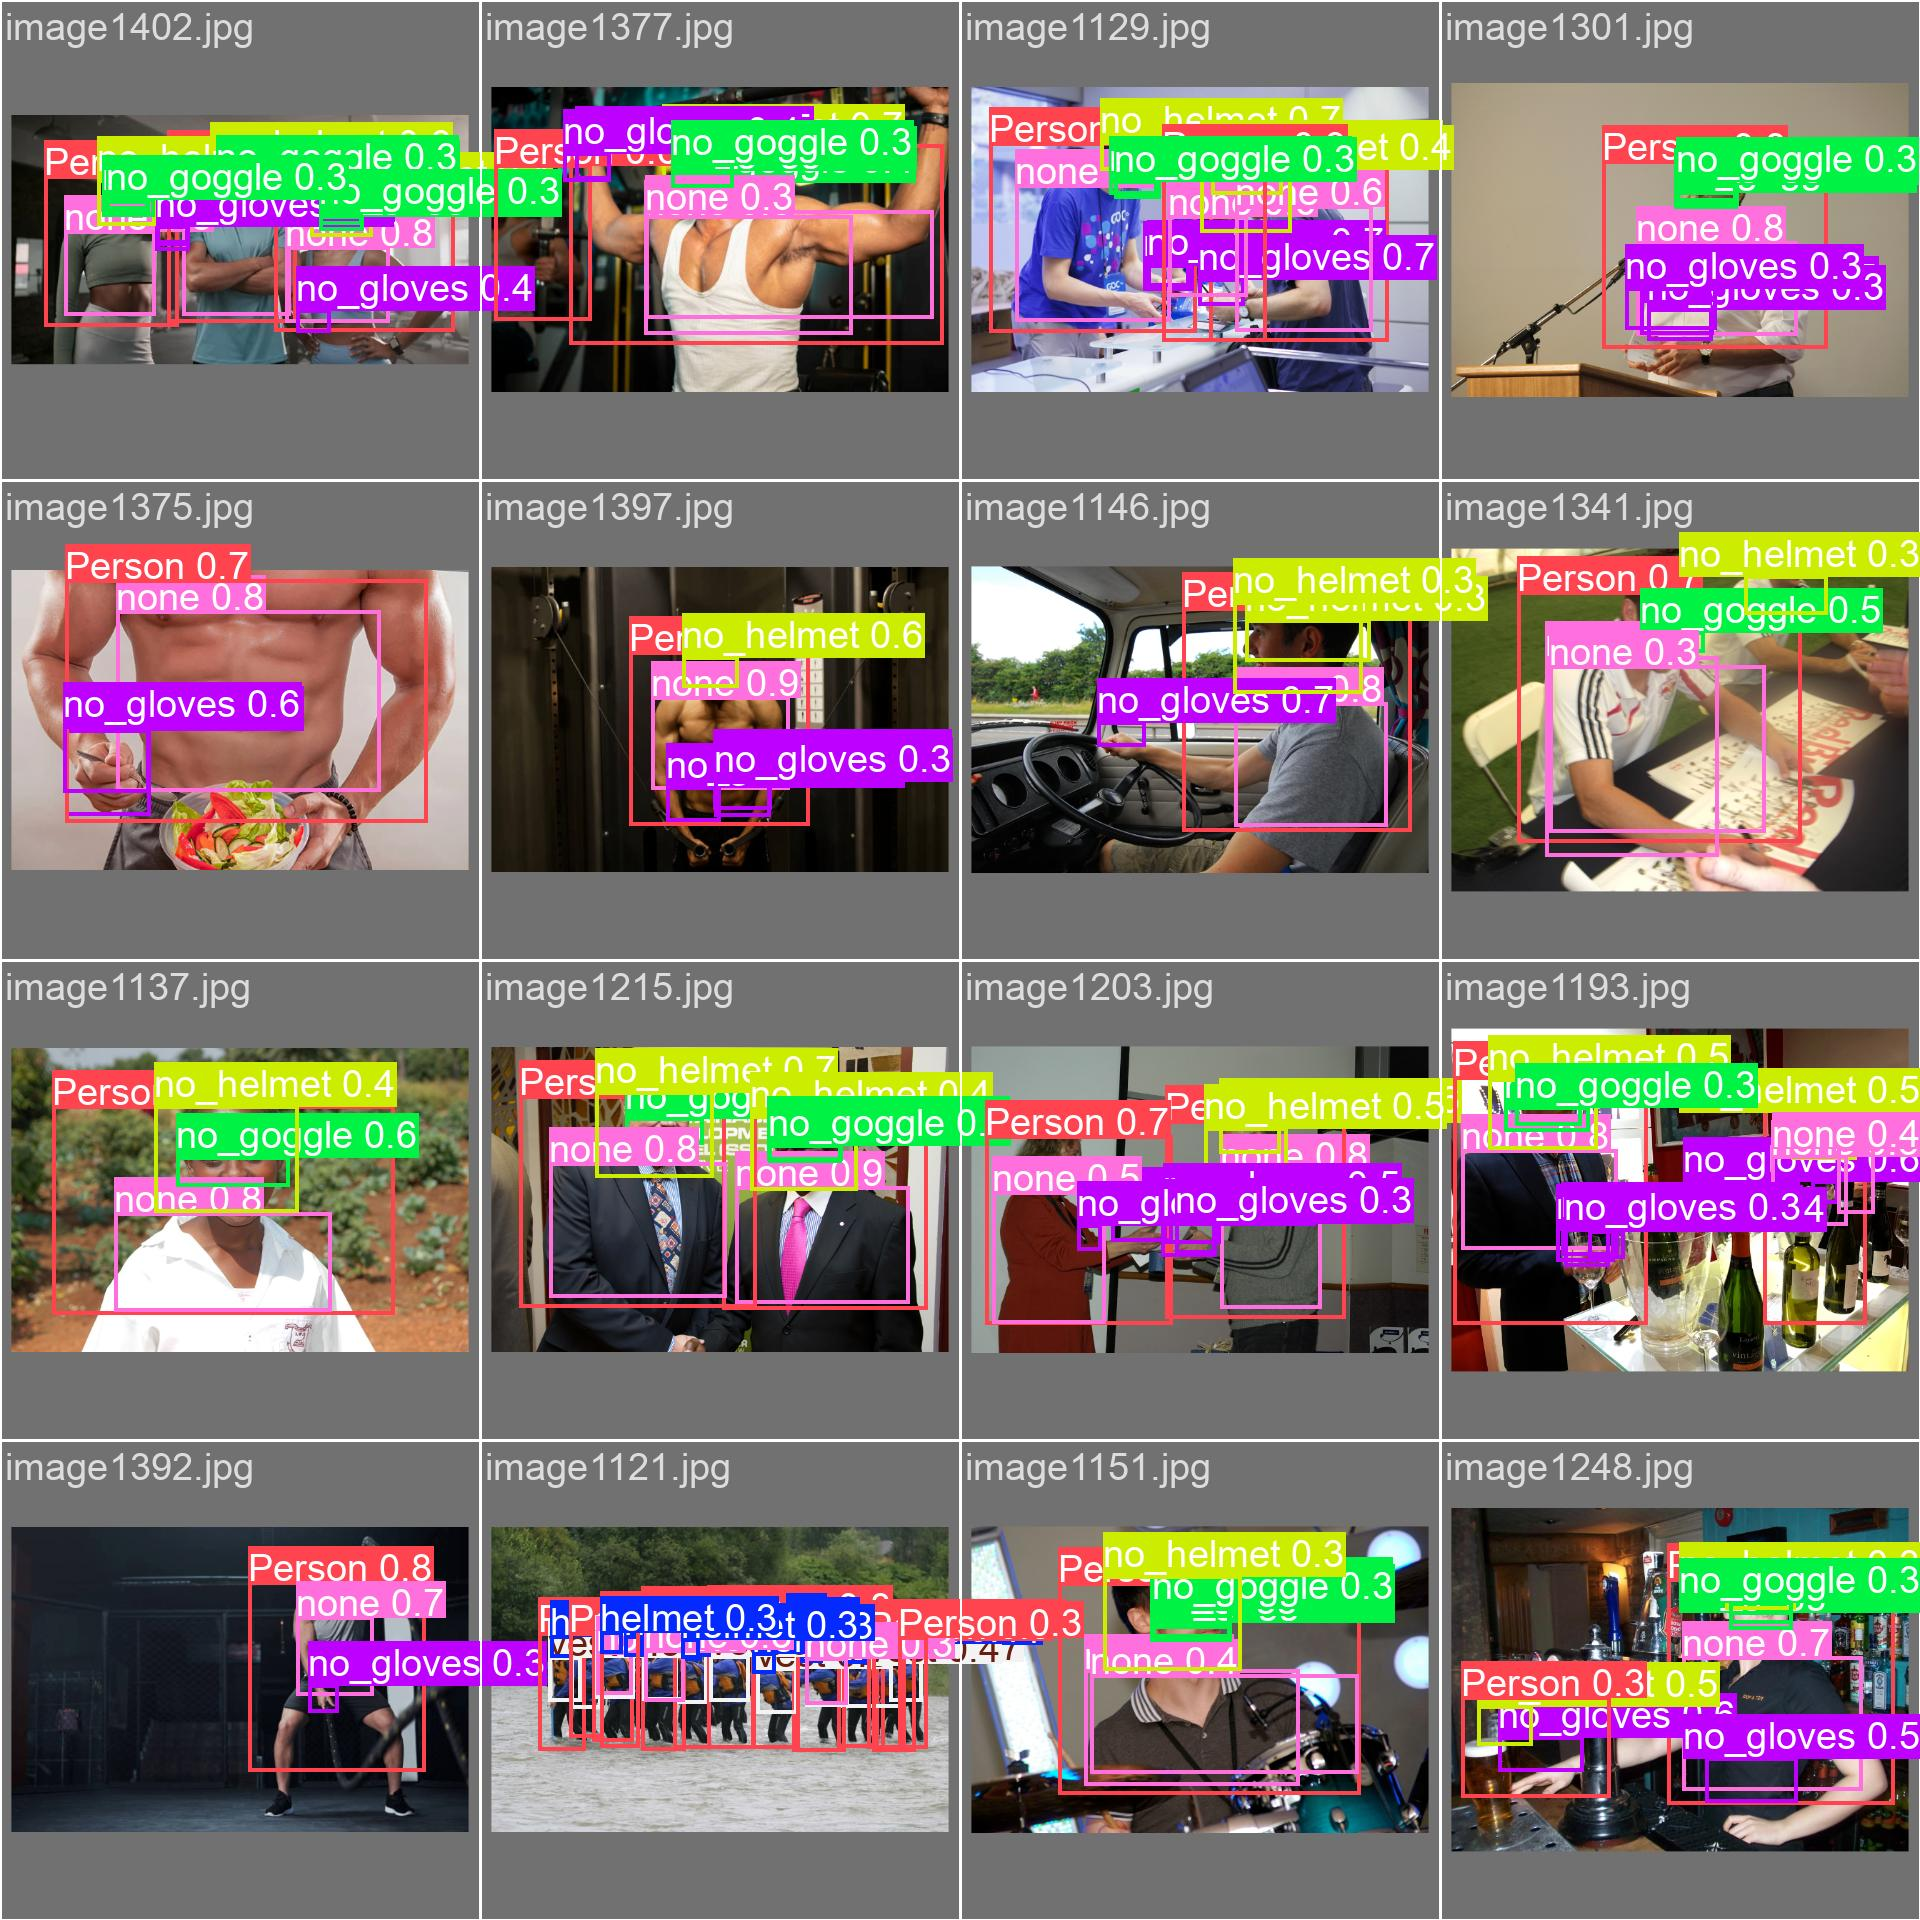

In [6]:
# ===== HIỂN THỊ KẾT QUẢ =====
print("\n📊 TRAINING RESULTS:\n")

# Results plot
try:
    display(Image(filename='ppe_training/yolo11m_ppe/results.png', width=800))
except:
    print("⚠️ Results plot not found yet")

print("\n📊 CONFUSION MATRIX:\n")
try:
    display(Image(filename='ppe_training/yolo11m_ppe/confusion_matrix.png', width=600))
except:
    print("⚠️ Confusion matrix not found yet")

print("\n📊 VALIDATION PREDICTIONS:\n")
try:
    display(Image(filename='ppe_training/yolo11m_ppe/val_batch0_pred.jpg', width=800))
except:
    print("⚠️ Validation predictions not found yet")


In [7]:
# ===== VALIDATION METRICS =====
print("\n🔍 Running validation on best model...")
best_model = YOLO('ppe_training/yolo11m_ppe/weights/best.pt')
metrics = best_model.val()

print("\n📈 FINAL METRICS:")
print("="*60)
print(f"  mAP50-95:  {metrics.box.map:.4f}")
print(f"  mAP50:     {metrics.box.map50:.4f}")
print(f"  mAP75:     {metrics.box.map75:.4f}")
print(f"  Precision: {metrics.box.mp:.4f}")
print(f"  Recall:    {metrics.box.mr:.4f}")
print("="*60)



🔍 Running validation on best model...
Ultralytics 8.3.224 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,038,513 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 494.1±1017.0 MB/s, size: 91.4 KB)
val: Scanning /content/datasets/construction-ppe/labels/val.cache... 143 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 143/143 305.5Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 1.4it/s 6.5s
                   all        143       1172      0.672      0.547       0.59      0.295
                helmet        107        201      0.861      0.801      0.838      0.457
                gloves         68        136      0.894       0.75      0.801      0.407
                  vest        109        171      0.796      0.824      0.848      0.521
                 boots         64        151      0.861      0.741      0.794  

In [8]:
# ===== CLASS-WISE METRICS =====
print("\n📊 CLASS-WISE METRICS:")
print("="*60)
class_names = best_model.names
for i, name in class_names.items():
    if i < len(metrics.box.ap_class_index):
        idx = list(metrics.box.ap_class_index).index(i) if i in metrics.box.ap_class_index else None
        if idx is not None:
            print(f"  {name:20s}: mAP50={metrics.box.ap50[idx]:.4f}")
print("="*60)



📊 CLASS-WISE METRICS:
  helmet              : mAP50=0.8379
  gloves              : mAP50=0.8011
  vest                : mAP50=0.8485
  boots               : mAP50=0.7943
  goggles             : mAP50=0.8319
  none                : mAP50=0.5538
  Person              : mAP50=0.9050
  no_helmet           : mAP50=0.4033
  no_goggle           : mAP50=0.2522
  no_gloves           : mAP50=0.2390
  no_boots            : mAP50=0.0206


In [9]:
# ===== SAVE TO GOOGLE DRIVE =====
print("\n💾 Saving to Google Drive...")

# Create directory
!mkdir -p "/content/drive/MyDrive/YOLOv11_PPE_Models"

# Copy models
!cp ppe_training/yolo11m_ppe/weights/best.pt "/content/drive/MyDrive/YOLOv11_PPE_Models/yolo11m_ppe_best_.pt"
!cp ppe_training/yolo11m_ppe/weights/last.pt "/content/drive/MyDrive/YOLOv11_PPE_Models/yolo11m_ppe_last_.pt"

# Copy training results
!cp -r ppe_training/yolo11m_ppe "/content/drive/MyDrive/YOLOv11_PPE_Models/training_results"

print("\n✅ Models saved successfully!")
print("📁 Location: /content/drive/MyDrive/YOLOv11_PPE_Models/")


💾 Saving to Google Drive...

✅ Models saved successfully!
📁 Location: /content/drive/MyDrive/YOLOv11_PPE_Models/



🧪 Testing inference on validation images...

📸 Running inference on 5 sample images...

0: 640x640 3 helmets, 1 gloves, 2 vests, 1 goggles, 1 none, 3 Persons, 43.4ms
1: 640x640 1 helmet, 1 gloves, 1 vest, 1 Person, 43.4ms
2: 640x640 1 helmet, 1 gloves, 1 vest, 2 bootss, 1 Person, 43.4ms
3: 640x640 1 helmet, 1 vest, 1 Person, 43.4ms
4: 640x640 1 none, 1 Person, 1 no_goggle, 1 no_gloves, 1 no_boots, 43.4ms
Speed: 11.0ms preprocess, 43.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/test_inference/results

📊 SAMPLE PREDICTIONS:



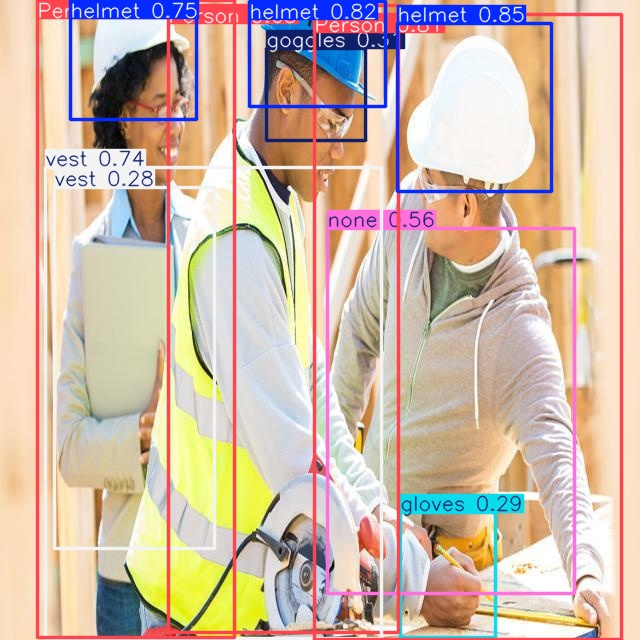


🎯 DETECTIONS:
  ✓ helmet: 0.85
  ✓ helmet: 0.82
  ✓ Person: 0.81
  ✓ helmet: 0.75
  ✓ Person: 0.75
  ✓ vest: 0.74
  ✓ Person: 0.65
  ✓ none: 0.56
  ✓ goggles: 0.31
  ✓ gloves: 0.29
  ✓ vest: 0.28


In [11]:
# ===== TEST INFERENCE =====
print("\n🧪 Testing inference on validation images...")

# Get a sample image
import glob
val_images = glob.glob('datasets/construction-ppe/images/val/*.jpg')[:5]

if val_images:
    print(f"\n📸 Running inference on {len(val_images)} sample images...")

    test_results = best_model.predict(
        source=val_images,
        conf=0.25,
        iou=0.45,
        save=True,
        project='test_inference',
        name='results',
        max_det=1000
    )

    print("\n📊 SAMPLE PREDICTIONS:\n")

    # Display first result
    result_images = glob.glob('test_inference/results/*.jpg')
    if result_images:
        display(Image(filename=result_images[0], width=800))

        # Print detections
        print("\n🎯 DETECTIONS:")
        for r in test_results[:1]:  # First image only
            boxes = r.boxes
            if len(boxes) > 0:
                for box in boxes:
                    cls = int(box.cls[0])
                    conf = float(box.conf[0])
                    name = best_model.names[cls]
                    print(f"  ✓ {name}: {conf:.2f}")
            else:
                print("  No detections")
